# I. Import libraries and Expolatory basic dataset and Processing

In [1]:
import numpy as np
import pandas as pd

# trực quan
import matplotlib.pyplot as plt
import seaborn as sb

# model
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'D:\DA\Tự học\Customer Churn Prediction\Dataset\raw_data.csv', encoding='latin-1')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In 'TotalCharges' we have 11 null after change type, so we need check some data

In [9]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


1. We can see that the Tenure column is 0 for these entries even though the monthlycharges column is not empty. So we cannot fill the Total Charges column with median
2. We will see if there are still Tenure values ​​that are 0

In [10]:
data[data['tenure'] == 0].index 

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

no additional 0 values in Tenture, so I will drop them

In [11]:
data = data[data['TotalCharges'].notnull()]

In [12]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# II. Numerical Variable
('TotalCharges', 'MonthlyCharges', 'tenure', 'tenure_group')

In [14]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"]
data[numerical].describe()

,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,32.421786
std,30.085974,2266.771362,24.545260
min,18.250000,18.800000,1.000000
25%,35.587500,401.450000,9.000000
50%,70.350000,1397.475000,29.000000
75%,89.862500,3794.737500,55.000000
max,118.750000,8684.800000,72.000000


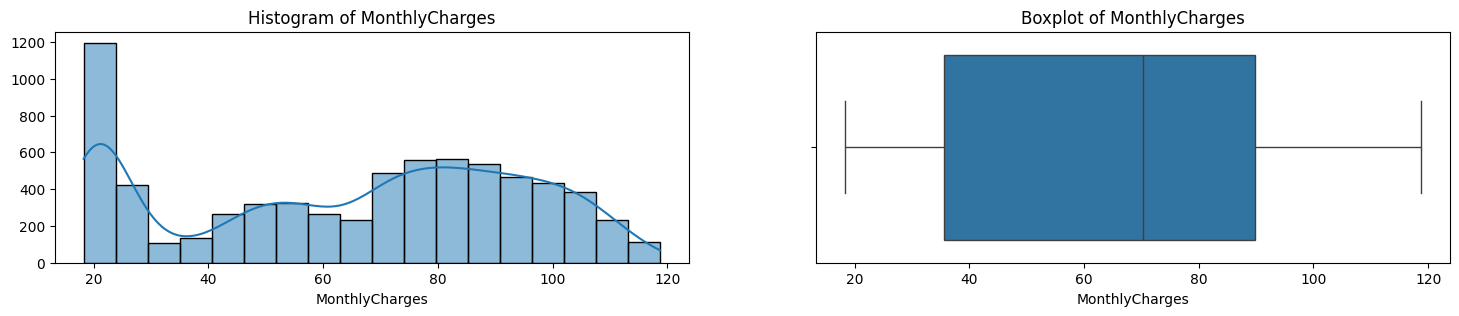

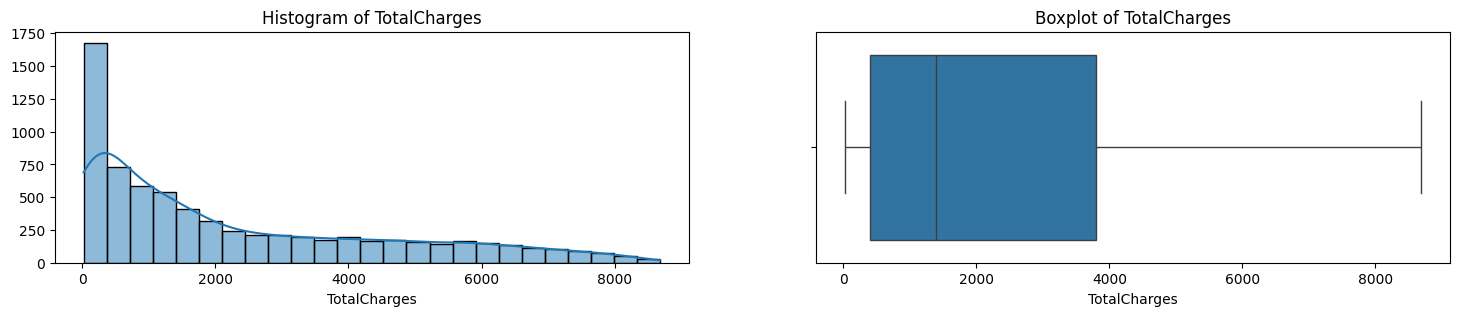

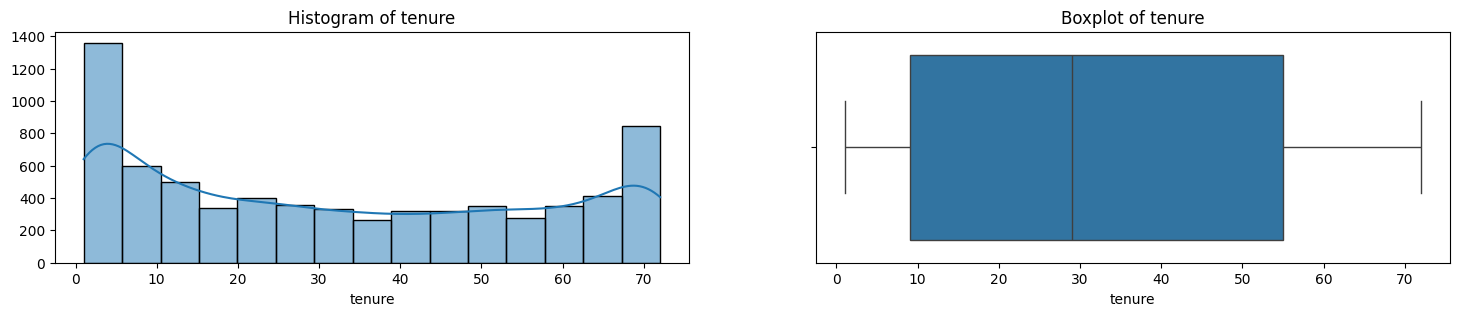

In [15]:
# numeric column (check outlier)
for col in numerical:
    plt.figure(figsize=(18, 3))
    plt.subplot(1, 2, 1)
    sb.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    # set set_ylabel('')
    plt.ylabel('')
    plt.subplot(1, 2, 2)
    sb.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

1.   TotalCharges: Right-skewed, but no outliers
2.   MonthlyCharges: The distribution is somewhat skewed but not significantly so.
3.   tenure: The distribution is quite skewed to the right, concentrated in small values.


In [16]:
Q1 = data[numerical].quantile(0.25)
Q3 = data[numerical].quantile(0.75)
IQR = Q3 - Q1
IQR
((data[numerical] < (Q1 - 1.5 * IQR)) | (data[numerical] > (Q3 + 1.5 * IQR))).any()

MonthlyCharges    False
TotalCharges      False
tenure            False
dtype: bool

No outiers in dataset

In [17]:
# Tìm kiếm khách hàng đăng ký 1 tháng (MonthlyCharges = TotalCharges)
data[data['TotalCharges'] == data['MonthlyCharges']] # or tenure == 1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,5351-QESIO,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,No
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


In [18]:
# % khách hàng đăng ký 1 tháng trên toàn bộ dòng
print(len(data[data['TotalCharges'] == data['MonthlyCharges']]) / len(data) * 100)

8.717292377701934


The number of customers registering in the first month is low, accounting for 8.7%

In [19]:
print(len(data[data['tenure'] == 1]) / len(data) * 100)

8.717292377701934


The dataset is highly accurate (tenure one-month --> so TotalCharges = MonthlyCharges)

In [20]:
data[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()

,TotalCharges,MonthlyCharges,tenure
TotalCharges,1.000000,0.651065,0.825880
MonthlyCharges,0.651065,1.000000,0.246862
tenure,0.825880,0.246862,1.000000


In [21]:
x=np.corrcoef(data.TotalCharges, data.MonthlyCharges*data.tenure)
x

array([[1.        , 0.99955986],
       [0.99955986, 1.        ]])

<Axes: >

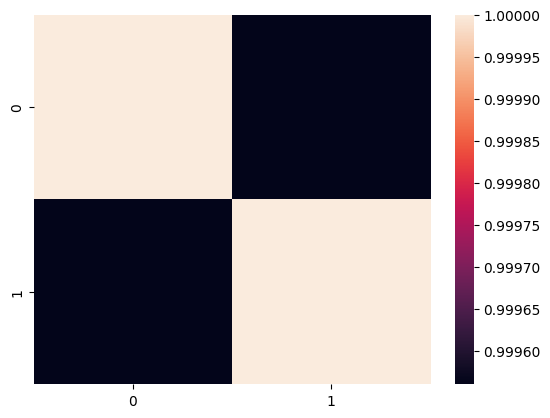

In [22]:
sb.heatmap(x)

correlation is very high, so we need to **drop TotalCharges or MonthlyCharges**

*Problem: With Churn and Non-churn, is there a difference in the number of months of service (tenure) between the two groups?*

In [23]:
churn = data[data["Churn"] == 'Yes']  
non_churn = data[data["Churn"] == 'No']    

print("Mean tenure - Churn:", churn["tenure"].mean())  
print("Mean tenure - Non-Churn:", non_churn["tenure"].mean())  

Mean tenure - Churn: 17.979133226324237
Mean tenure - Non-Churn: 37.65000968429208


- On average, Churn customers have a significantly shorter usage time compared to Non-Churn. (mean 20 month)

In [24]:
from scipy.stats import ttest_ind  

t_stat, p_value = ttest_ind(non_churn["tenure"], churn["tenure"],  equal_var=False)  
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")  

T-statistic: 34.97, P-value: 0.0000


- P-value < 0.05 → There is a statistically significant difference in the number of months of use between the two groups. 

In [25]:
from scipy.stats import norm

# Tính khoảng tin cậy 95% cho sự khác biệt mean  
diff_mean = churn["tenure"].mean() - non_churn["tenure"].mean()  
std_error = np.sqrt((churn["tenure"].var()/len(churn)) + (non_churn["tenure"].var()/len(non_churn)))  

z_critical = norm.ppf(1 - (1 - 0.95)/2)  # Tính z* cho CI 95%

ci_lower = diff_mean - z_critical * std_error  
ci_upper = diff_mean + z_critical * std_error

print(f"Mean difference: {diff_mean:.2f} months")  
print(f"CI 95%: [{ci_lower:.2f} ; {ci_upper:.2f}]")  

Mean difference: -19.67 months
CI 95%: [-20.77 ; -18.57]


In [26]:
# Get the max tenure
print(data['tenure'].max())

72


Exploratory 'tenture' by month is a lot, we need to group it by year group

In [27]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [28]:
tenure_group = data['tenure_group'].value_counts().reset_index()
tenure_group['percent'] = tenure_group['count'] / data['tenure_group'].value_counts().sum() * 100
tenure_group

,tenure_group,count,percent
0,1 - 12,2175,30.930034
1,61 - 72,1407,20.008532
2,13 - 24,1024,14.562002
3,25 - 36,832,11.831627
4,49 - 60,832,11.831627
5,37 - 48,762,10.836177


<Axes: xlabel='tenure_group', ylabel='count'>

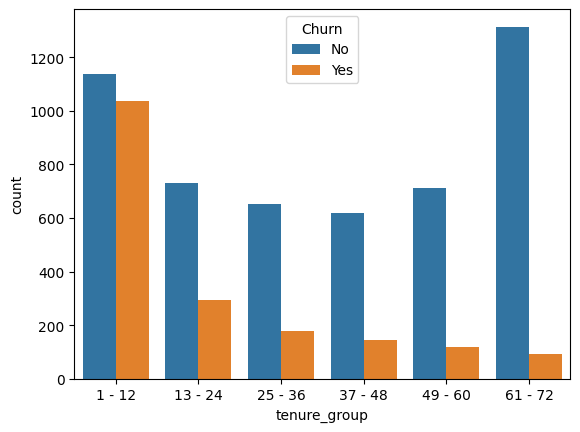

In [29]:
sb.countplot(data, x='tenure_group', hue='Churn')

In [30]:
tenure_group_1_12 = data[data['tenure_group'] == '1 - 12'].value_counts().groupby('Churn').count().reset_index()
tenure_group_1_12['percent'] = (tenure_group_1_12['count'] / tenure_group_1_12['count'].sum()) * 100
tenure_group_1_12

,Churn,count,percent
0,No,1138,52.321839
1,Yes,1037,47.678161


# III. Categorical Variable
('Gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod')

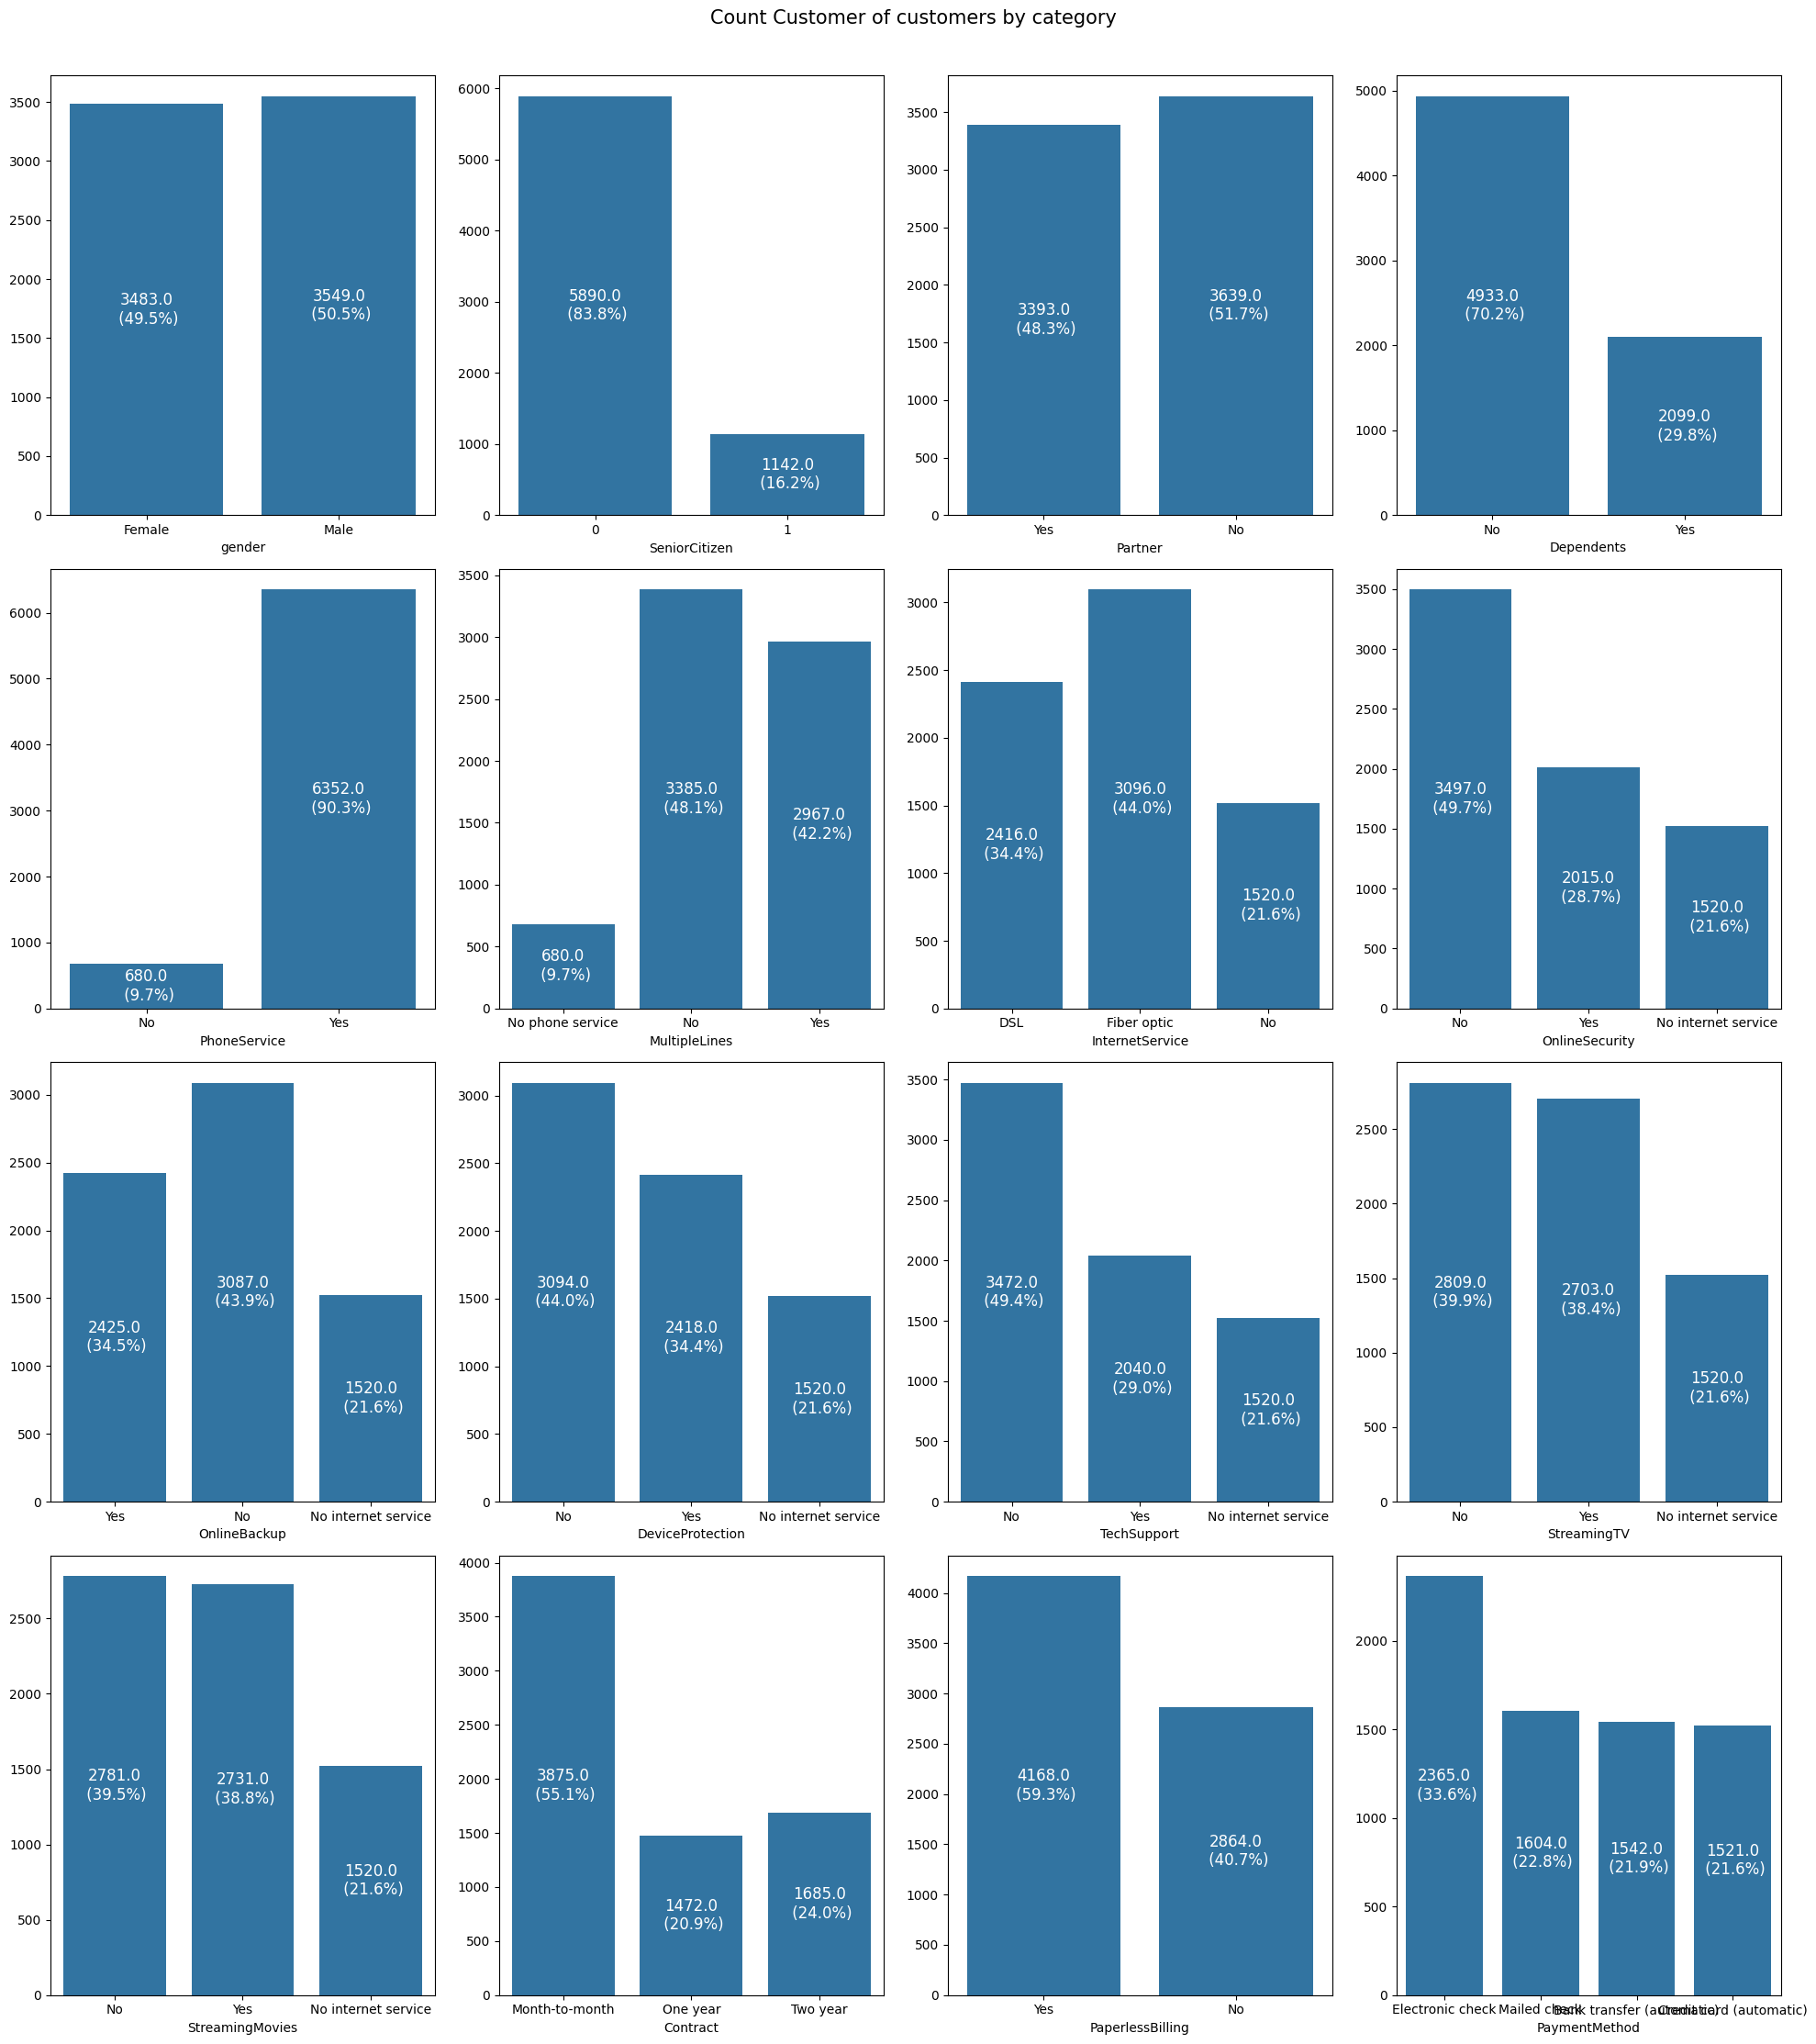

In [31]:
#Univariate Analysis
category_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Tạo Figure với 4x4 subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
fig.suptitle('Count Customer of customers by category', fontsize=15, y=1.01)

for ax, col in zip(axes.flatten(), category_cols):
    total = len(data[category_cols])  # Tổng số quan sát

    # Vẽ countplot
    sb.countplot(data=data[category_cols], x=col, ax=ax)

    # Lặp qua các cột (patch) để hiển thị số và %
    for p in ax.patches:
        count = p.get_height()                       # Số lượng
        percentage = f"{100 * count / total:.1f}%"   # Tính phần trăm
        x_pos = p.get_x() + p.get_width() / 2        # Tọa độ X ở giữa cột
        y_pos = p.get_height() / 2                  # Tọa độ Y ở giữa chiều cao cột

        # Ghi chú bên trong cột
        ax.annotate(
            f"{count}\n ({percentage})",
            (x_pos, y_pos),
            ha='center',
            va='center',
            color='white',
            fontsize=12,
        )
    # Thiết lập tiêu đề và trục
    # ax.set_title(f'Customer by {col}') #, fontsize=14, fontweight='bold'
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

Analysis relationship of churn variable with other category variables

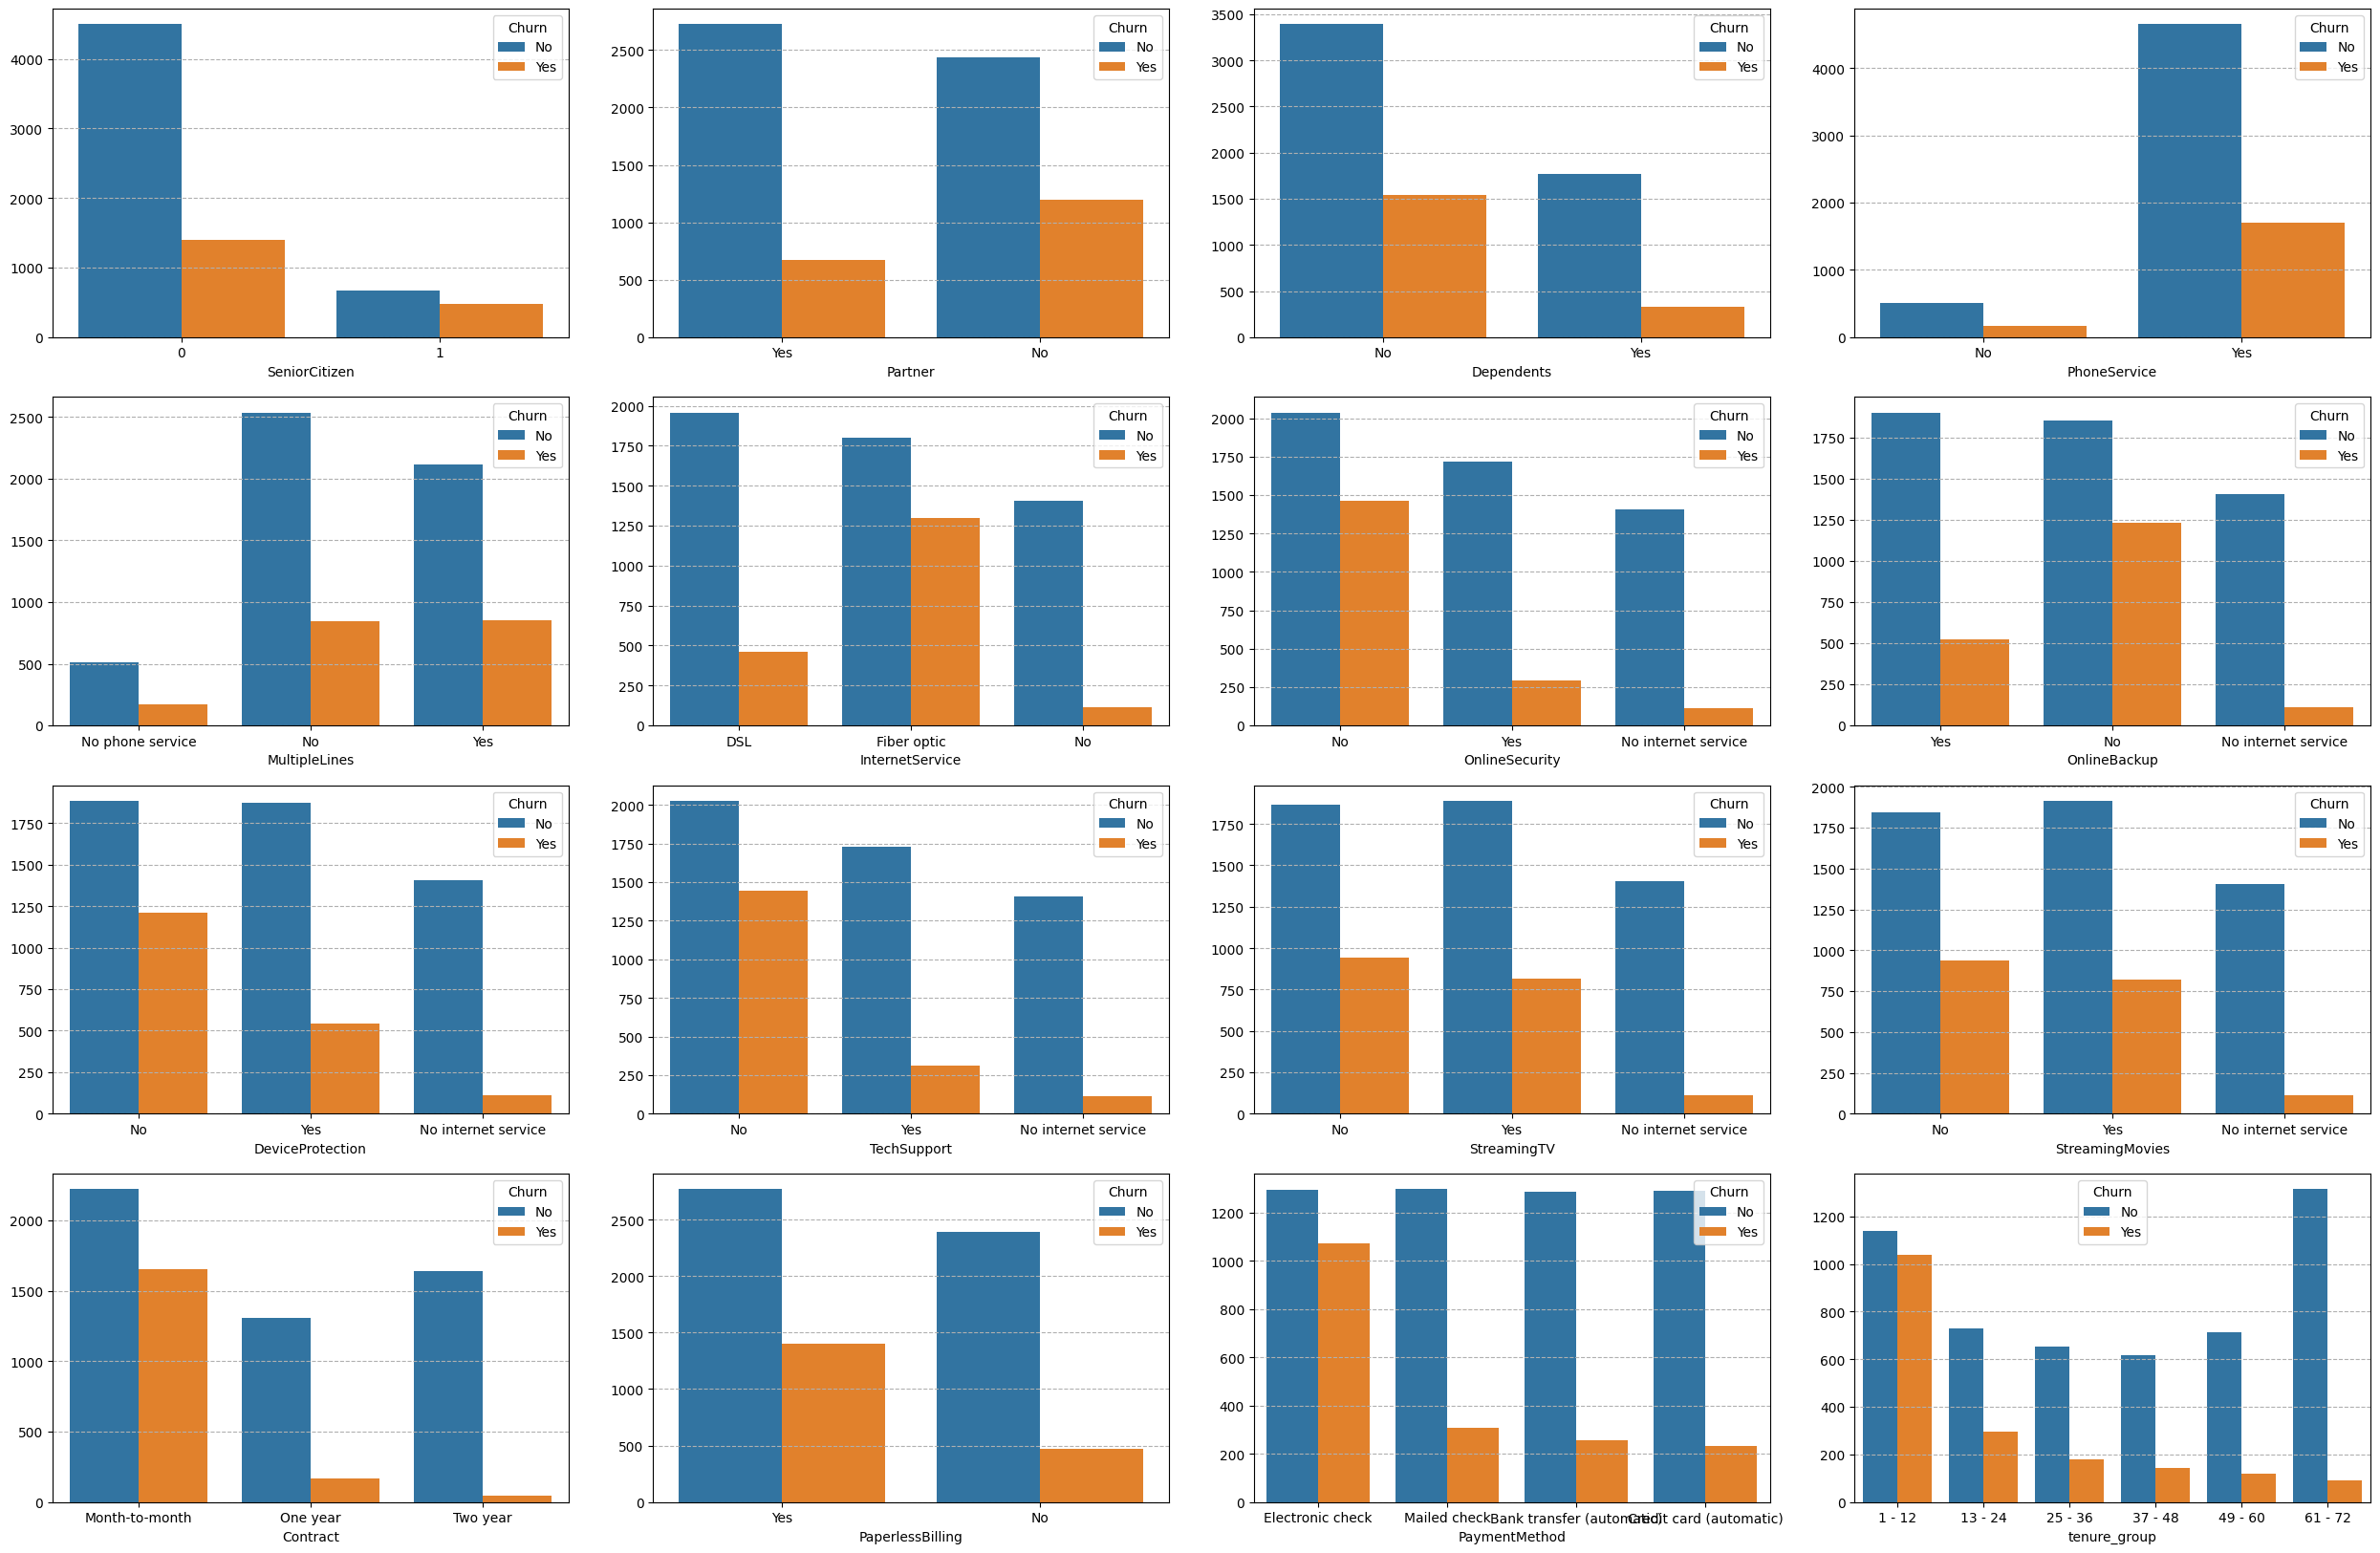

In [32]:
#Univariate Analysis: Phân tích đa biến
# Danh sách cột cần vẽ
cols = ['SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

# Tạo subplots với 4 hàng, 5 cột
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
axes = axes.flatten()  # Chuyển mảng 2D về 1D để dễ duyệt

# Vẽ từng biểu đồ
for i, col in enumerate(cols):
    sb.countplot(data=data, x=col, hue='Churn', ax=axes[i])
    # set grid
    axes[i].grid(True, axis='y', linestyle='--')
    # axes[i].set_title(f'Customer by {col}')
    # xóa y label title
    axes[i].set_ylabel('')

# Xóa các subplot trống nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observation: Things to note**
1. In 'SeniorCitizen', most younger customers use the service more than older customers and have a higher churn rate, but we need to dig deeper to discover
2. In 'Contract': Customers with one- or two-year contracts rarely leave the service.  
3. In 'tenture_group', we can see most customers will care more about service in the next 12 months - this time are very important. When they are using to using, some customers will not churn much over time.

In [33]:
def stacked_plot(data, features, target, ax):
    df = (data.groupby([features, target]).size()*100/data.groupby(features)[target].count()).reset_index().pivot(columns=target, index=features, values=0)
    df.plot(kind='bar', stacked=True, ax = ax)
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_title(f'% Churn by {features}')
    ax.set_xlabel(features)
    ax.set_ylabel('% Churn')

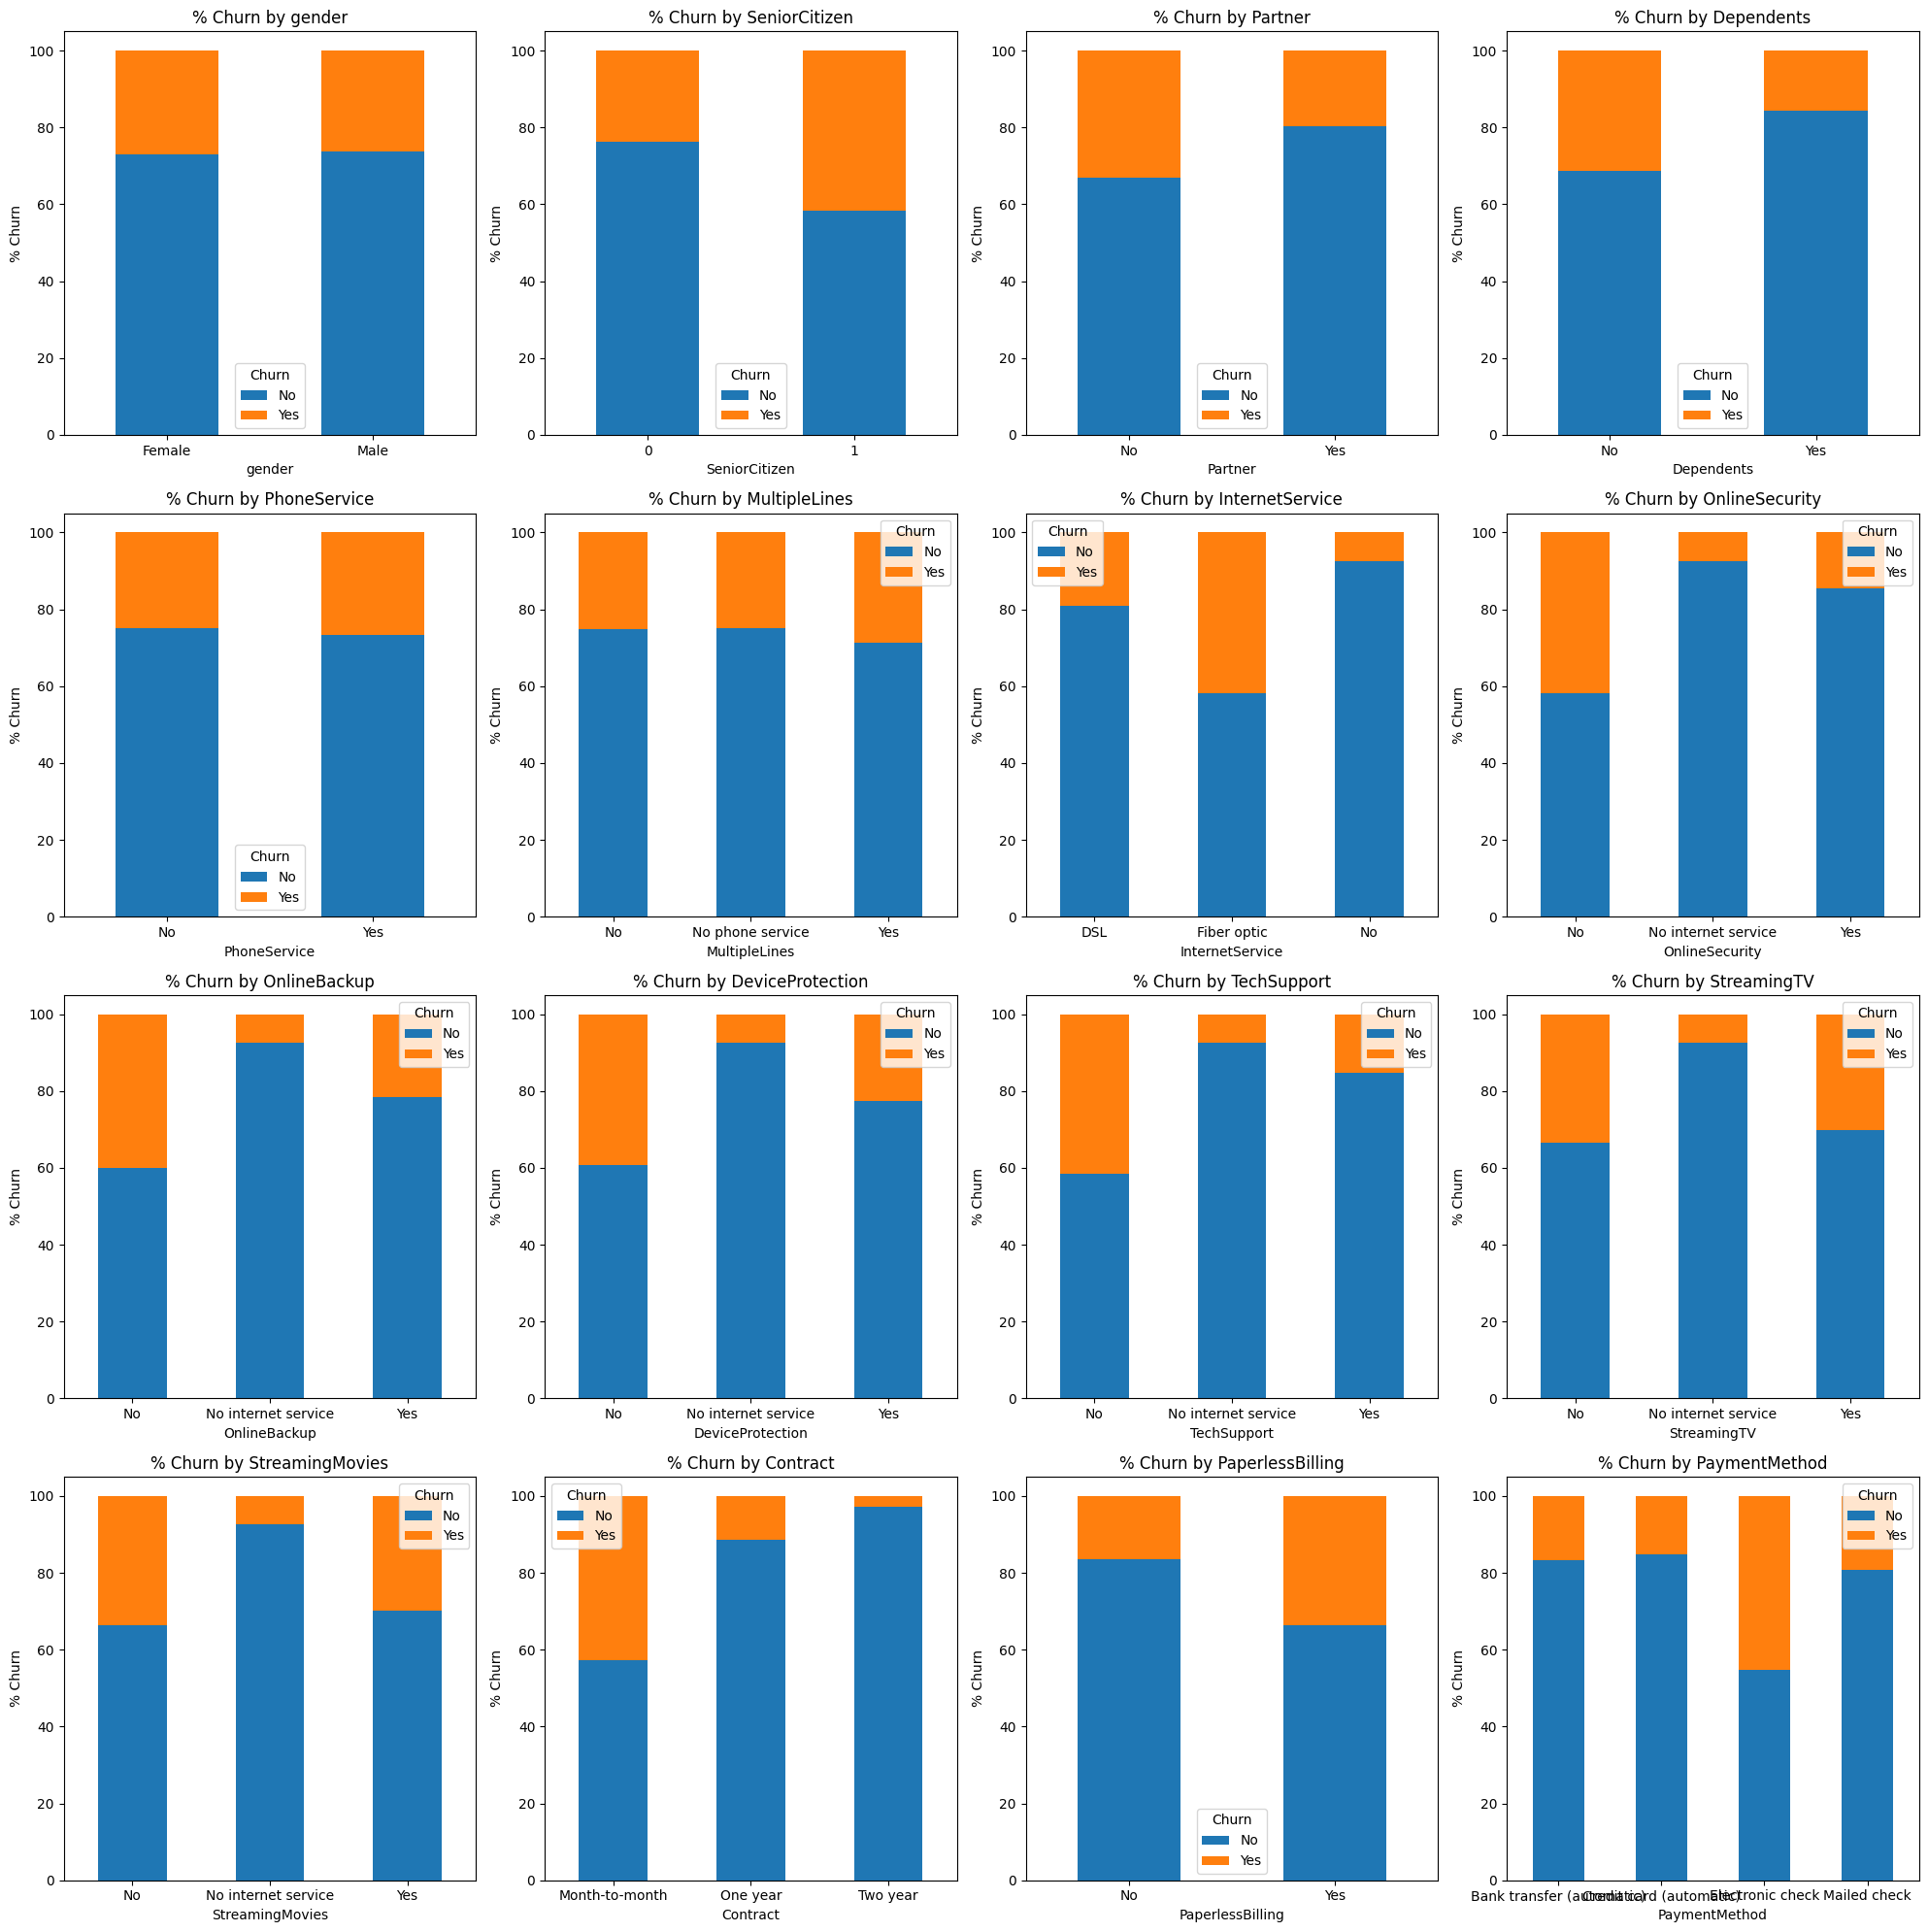

In [34]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(category_cols):
    stacked_plot(data, col, 'Churn', axes[i])

plt.tight_layout()
plt.show()


In [35]:
def stacked_table(data, feature, target):
    df = (
        data.groupby([feature, target])
        .size() * 100 / data.groupby(feature)[target].count()
    ).reset_index().pivot(columns=target, index=feature, values=0)
    df.columns = [f'Churn_{col} (%)' for col in df.columns]
    df = df.round(2)
    return df


In [36]:
for col in category_cols:
    print(f"\n==== {col} vs Churn ====")
    display(stacked_table(data, col, 'Churn'))


==== gender vs Churn ====


,Churn_No (%),Churn_Yes (%)
gender,,
Female,73.04,26.96
Male,73.80,26.20



==== SeniorCitizen vs Churn ====


,Churn_No (%),Churn_Yes (%)
SeniorCitizen,,
0,76.35,23.65
1,58.32,41.68



==== Partner vs Churn ====


,Churn_No (%),Churn_Yes (%)
Partner,,
No,67.02,32.98
Yes,80.28,19.72



==== Dependents vs Churn ====


,Churn_No (%),Churn_Yes (%)
Dependents,,
No,68.72,31.28
Yes,84.47,15.53



==== PhoneService vs Churn ====


,Churn_No (%),Churn_Yes (%)
PhoneService,,
No,75.00,25.00
Yes,73.25,26.75



==== MultipleLines vs Churn ====


,Churn_No (%),Churn_Yes (%)
MultipleLines,,
No,74.92,25.08
No phone service,75.00,25.00
Yes,71.35,28.65



==== InternetService vs Churn ====


,Churn_No (%),Churn_Yes (%)
InternetService,,
DSL,81.00,19.00
Fiber optic,58.11,41.89
No,92.57,7.43



==== OnlineSecurity vs Churn ====


,Churn_No (%),Churn_Yes (%)
OnlineSecurity,,
No,58.22,41.78
No internet service,92.57,7.43
Yes,85.36,14.64



==== OnlineBackup vs Churn ====


,Churn_No (%),Churn_Yes (%)
OnlineBackup,,
No,60.06,39.94
No internet service,92.57,7.43
Yes,78.43,21.57



==== DeviceProtection vs Churn ====


,Churn_No (%),Churn_Yes (%)
DeviceProtection,,
No,60.86,39.14
No internet service,92.57,7.43
Yes,77.46,22.54



==== TechSupport vs Churn ====


,Churn_No (%),Churn_Yes (%)
TechSupport,,
No,58.35,41.65
No internet service,92.57,7.43
Yes,84.80,15.20



==== StreamingTV vs Churn ====


,Churn_No (%),Churn_Yes (%)
StreamingTV,,
No,66.46,33.54
No internet service,92.57,7.43
Yes,69.89,30.11



==== StreamingMovies vs Churn ====


,Churn_No (%),Churn_Yes (%)
StreamingMovies,,
No,66.27,33.73
No internet service,92.57,7.43
Yes,70.05,29.95



==== Contract vs Churn ====


,Churn_No (%),Churn_Yes (%)
Contract,,
Month-to-month,57.29,42.71
One year,88.72,11.28
Two year,97.15,2.85



==== PaperlessBilling vs Churn ====


,Churn_No (%),Churn_Yes (%)
PaperlessBilling,,
No,83.62,16.38
Yes,66.41,33.59



==== PaymentMethod vs Churn ====


,Churn_No (%),Churn_Yes (%)
PaymentMethod,,
Bank transfer (automatic),83.27,16.73
Credit card (automatic),84.75,15.25
Electronic check,54.71,45.29
Mailed check,80.80,19.20


The churn rates between the values ​​in the **Gender, PhoneService, MultipleLines** columns are almost the same, with no obvious difference.

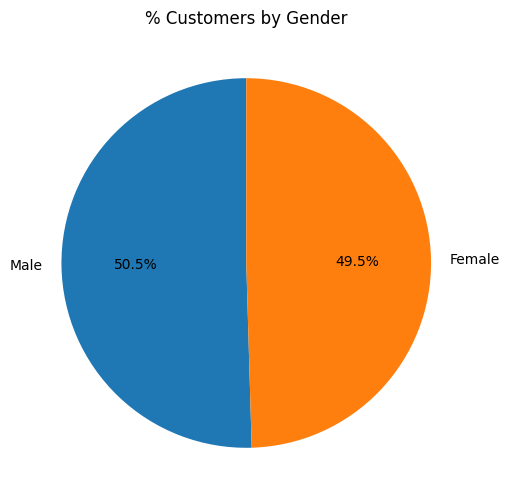

In [37]:
# số lượng người đăng ký theo gender
plt.figure(figsize=(6, 6))
plt.pie(data['gender'].value_counts(), labels=data['gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('% Customers by Gender')
plt.show()

The ratio of male and female is the same, it seems that Churn is not related to **Gender**

In [38]:
senior_citizen_by_tenure_group = data.groupby(['tenure_group', 'SeniorCitizen']).size().unstack(fill_value=0)
senior_citizen_by_tenure_group

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6664\1452315215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  senior_citizen_by_tenure_group = data.groupby(['tenure_group', 'SeniorCitizen']).size().unstack(fill_value=0)


SeniorCitizen,0,1
tenure_group,,
1 - 12,1855,320
13 - 24,856,168
25 - 36,674,158
37 - 48,639,123
49 - 60,685,147
61 - 72,1181,226


In [39]:
# demographic
display(pd.crosstab(data['gender'], [data['SeniorCitizen'], data['Partner'], data['Dependents']], dropna=False))

SeniorCitizen     0                   1             
Partner          No       Yes        No      Yes    
Dependents       No  Yes   No  Yes   No Yes   No Yes
gender                                              
Female         1338  142  596  839  317   3  209  39
Male           1381  209  567  818  244   5  281  44

In [40]:
## phone service, multiple lines, internet service
display(pd.crosstab(data['Churn'], [data['PhoneService'], data['MultipleLines'], data['InternetService']], dropna=False))

PhoneService     No                                                     \
MultipleLines    No                No phone service                Yes   
InternetService DSL Fiber optic No              DSL Fiber optic No DSL   
Churn                                                                    
No                0           0  0              510           0  0   0   
Yes               0           0  0              170           0  0   0   

PhoneService                    Yes                                     \
MultipleLines                    No                   No phone service   
InternetService Fiber optic No  DSL Fiber optic    No              DSL   
Churn                                                                    
No                        0  0  831         628  1077                0   
Yes                       0  0  216         530   103                0   

PhoneService                                          
MultipleLines                   Yes                   
InternetService Fiber optic No  DSL Fiber optic   No  
Churn                                                 
No                        0  0  616        1171  330  
Yes                       0  0   73         767   10

When customers do not use PhoneService, using Digital Subscriber Line (**DSL**) for Internet Service affects churn the most. If PhoneService is used, **Fiber optic** affects the most.

In [41]:
data[data['PhoneService'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,1 - 12
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1 - 12
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No,25 - 36
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No,61 - 72
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,1 - 12
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No,1 - 12


When a customer **doesn't using PhoneService**, it means they are in the **No Phone Service** case for MultipleLine and use Digital Subscriber Line (**DSL**) for InternetService. (I checked further in PowerBI)

In [42]:
display(pd.crosstab(data['Churn'], [data['OnlineBackup'], data['DeviceProtection'], data['TechSupport'], data['OnlineSecurity'], data['StreamingTV']], dropna=False))

OnlineBackup       No                                               \
DeviceProtection   No                                                
TechSupport        No                                                
OnlineSecurity     No                          No internet service   
StreamingTV        No No internet service  Yes                  No   
Churn                                                                
No                396                   0  153                   0   
Yes               482                   0  236                   0   

OnlineBackup                                                           \
DeviceProtection                                                        
TechSupport                                                             
OnlineSecurity                            Yes                           
StreamingTV      No internet service Yes   No No internet service Yes   
Churn                                                                   
No                                 0   0  151                   0  65   
Yes                                0   0   60                   0  32   

OnlineBackup                          ...                 Yes      \
DeviceProtection                      ...                 Yes       
TechSupport      No internet service  ... No internet service Yes   
OnlineSecurity                    No  ...                 Yes  No   
StreamingTV                       No  ...                 Yes  No   
Churn                                 ...                           
No                                 0  ...                   0  49   
Yes                                0  ...                   0   9   

OnlineBackup                                                   \
DeviceProtection                                                
TechSupport                                                     
OnlineSecurity                            No internet service   
StreamingTV      No internet service  Yes                  No   
Churn                                                           
No                                 0  167                   0   
Yes                                0   30                   0   

OnlineBackup                                                            
DeviceProtection                                                        
TechSupport                                                             
OnlineSecurity                            Yes                           
StreamingTV      No internet service Yes   No No internet service  Yes  
Churn                                                                   
No                                 0   0  122                   0  322  
Yes                                0   0    7                   0   18  

[2 rows x 243 columns]

When I check the combination in PowerBI, I see that if **InternetService = 'No'**, then **all the above services** will also be set as **'No internet service'** which is logical and reflects the uniformity in the service. In short, we can see that 'PhoneService' is related to 'InternetService'


In [43]:
display(pd.crosstab(data['Churn'], [data['PhoneService'], data['InternetService']], dropna=False))

PhoneService      No                  Yes                  
InternetService  DSL Fiber optic No   DSL Fiber optic    No
Churn                                                      
No               510           0  0  1447        1799  1407
Yes              170           0  0   289        1297   113

In [44]:
display(pd.crosstab(data['Churn'], [data['PaymentMethod'], data['PaperlessBilling'], data['Contract']], dropna=False))

PaymentMethod    Bank transfer (automatic)                                   \
PaperlessBilling                        No                              Yes   
Contract                    Month-to-month One year Two year Month-to-month   
Churn                                                                         
No                                     151      160      270            237   
Yes                                     55       11        6            146   

PaymentMethod                      Credit card (automatic)                    \
PaperlessBilling                                        No                     
Contract         One year Two year          Month-to-month One year Two year   
Churn                                                                          
No                    193      273                     116      161      298   
Yes                    27       13                      45       13        6   

PaymentMethod                    ... Electronic check                          \
PaperlessBilling            Yes  ...               No            Yes            
Contract         Month-to-month  ...         Two year Month-to-month One year   
Churn                            ...                                            
No                          249  ...               54            591      183   
Yes                         133  ...                2            806       50   

PaymentMethod               Mailed check                                   \
PaperlessBilling                      No                              Yes   
Contract         Two year Month-to-month One year Two year Month-to-month   
Churn                                                                       
No                    101            351      204      265            260   
Yes                    11            118       10        1            164   

PaymentMethod                       
PaperlessBilling                    
Contract         One year Two year  
Churn                               
No                    109      107  
Yes                    13        2  

[2 rows x 24 columns]

Churn
No     5163
Yes    1869
Name: count, dtype: int64


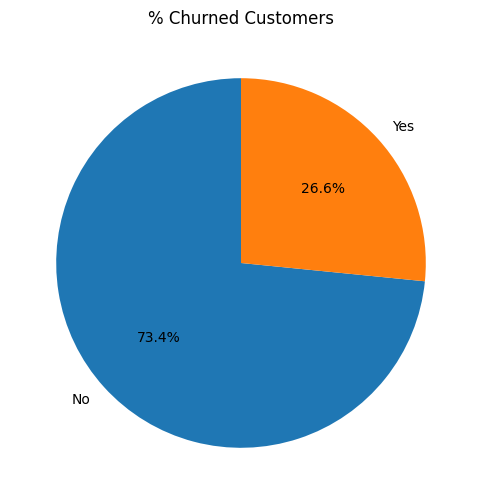

In [45]:
# Pie chart about 'churn'
churn_counts = data['Churn'].value_counts()
print(churn_counts)
# Vẽ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('% Churned Customers')
plt.show()

The "No" class (not churn) accounts for 73.4%, the "Yes" class (churn) only 26.6%. This is **unbalanced data** because the difference ratio > 7:3, so we need to solve the problem

In [46]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [47]:
# to csv
data.to_csv('D:\DA\Tự học\Customer Churn Prediction\Dataset\eda.csv', index=False)

# IV. Conclusion

I. Import libraries and Expolatory basic dataset and Processing

- No outiers in dataset

- About Dataset: Highly accurate data. **7:3 churn rate imbalance** will affect the forecasting model, so I decided to evaluate it with appropriate metrics.

II. Numerical Variable
      
  - **Right-skewed** Distribution

  - The number of customers registering in the first month is low, accounting for 8.7%

  - There is a **high correlation** between **TotalCharges** and **tenure*MonthlyCharges**

III. Categorical Variable

  - The churn rates between the values ​​in the **Gender, PhoneService, MultipleLines** columns are almost the same, with no obvious difference. 

  - Compared to the following years, the number of Non-SeniorCitizens is very high, this shows that a part of the young people are **new customers** (<1 year)

  - InternetService's use of **Fiber optic** has a major impact on customer churn.

  - Table of service element dependencies to 'PhoneService' and 'InternetService'

      | Service | InternetService = 'No'| PhoneService = 'No' |
      | --- | --- | --- |
      | PhoneService | Yes | No |
      | InternetService | No | DSL |
      | MultipleLines | Yes or No | No Phone Service |
      | OnlineSecurity | No internet service | No Affect |
      | OnlineBackup | No internet service | No Affect |
      | DeviceProtection | No internet service | No Affect |
      | TechSupport | No internet service | No Affect |
      | StreamingTV | No internet service | No Affect |
      | StreamingMovies | No internet service | No Affect |

  3. Churn
      - In 'tenure_group', we can see most customers will care more about service in the next 12 months - this time are very important. When they are using to using, some customers will not churn much over time.
